<a href="https://colab.research.google.com/github/anuj123-45/Customer_Segmentation/blob/master/Customer_Segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Definition
Customer Segmentation Data Science project aims to categorize a company's
customer base into distinct groups to enhance understanding of their
behaviors and preferences. We begin by collecting and cleaning customer data from various sources. Through exploratory data analysis (EDA), we identify key patterns and trends.
Clustering algorithms like K-means are applied to segment customers based on features such as purchasing behavior and demographics. The resulting segments are validated for business
relevance and presented through clear visualizations. We deliver a detailed report with recommendations for personalized marketing strategies and product offerings for each segment. Finally, we collaborate with stakeholders
to implement and track the effectiveness of these strategies.


In [3]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# loading data
df=pd.read_csv('/content/drive/MyDrive/ecom customer_data.csv')
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
# give data has 30000 rows with 38 features
df.shape


(30000, 38)

In [ ]:
# Statistical Summary
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


**Observation** : Average no of orders placed by customers is 4

# Data Cleaning and Preprocessing

In [ ]:
#Check for null values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [7]:
# count of null values in dataset
df.isna().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [ ]:
# Observation : As we can see only gender is containing null values

**Replace missing values in gender by performing dummy encoding**


In [8]:
dummies=pd.get_dummies(df['Gender'],dtype=int)
merged=pd.concat([dummies,df],axis=1)
data=merged
print(data.head())

   F  M  Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  ...  \
0  0  1        1      M       7       0         0        0     0     0  ...   
1  1  0        2      F       0       0         1        0     0     0  ...   
2  0  1        3      M       7       0         1        0     0     0  ...   
3  1  0        4      F       0       0         0        0     0     0  ...   
4  0  0        5    NaN      10       0         0        0     0     0  ...   

   LG  Dior  Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  \
0   0     0       0               0          0           0         0   
1   0     1       0               0          0           0         0   
2   0     0       0               0          0           0         0   
3   0     0       0               0          0           0         0   
4   0     0       2               0          0           0         0   

   Microsoft  Jiffy mix  Kraft  
0          0          0      0  
1          0          0   

In [9]:
# removing Gender column as it is encoded in 0 and 1
data=data.drop(['Gender'],axis=1)
data.head()

,F,M,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,1,1,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,3,7,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,5,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [10]:
# Renaming F and M columns (Female and Male)
data=data.rename(columns={'F': 'Female'})
data=data.rename(columns={'M': 'Male'})
data.head()

,Female,Male,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,1,1,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,3,7,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,5,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


**Exploratory Data Analysis (EDA)**

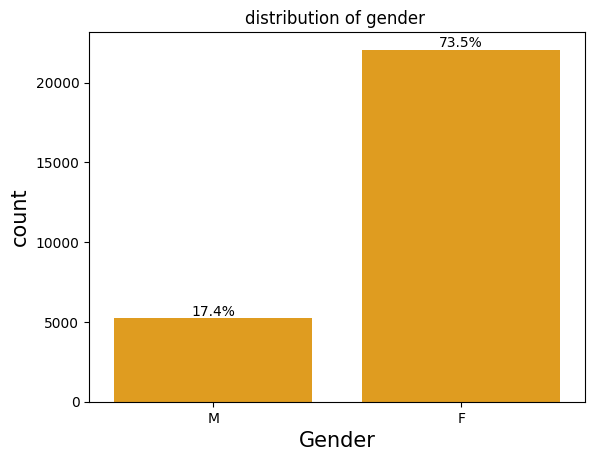

In [11]:
# Distribution of the gender of the customers
ax=sns.countplot(data=df,x='Gender',color='orange')
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{count/total:.1%}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.title('distribution of gender ')
plt.xlabel('Gender',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

**Observation**

Among 30000 users 73.5% are Female and 17.4% are Male

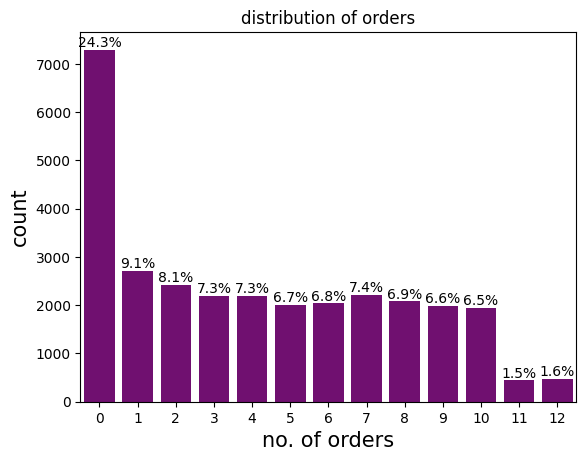

In [12]:
# Distribution of order placed by customers
ax=sns.countplot(data=df,x='Orders',color='purple')
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{count/total:.1%}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.title('distribution of orders')
plt.xlabel('no. of orders',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.show()

**Observation**

24.3% have done 0 orders and 1.6% have done 12 orders


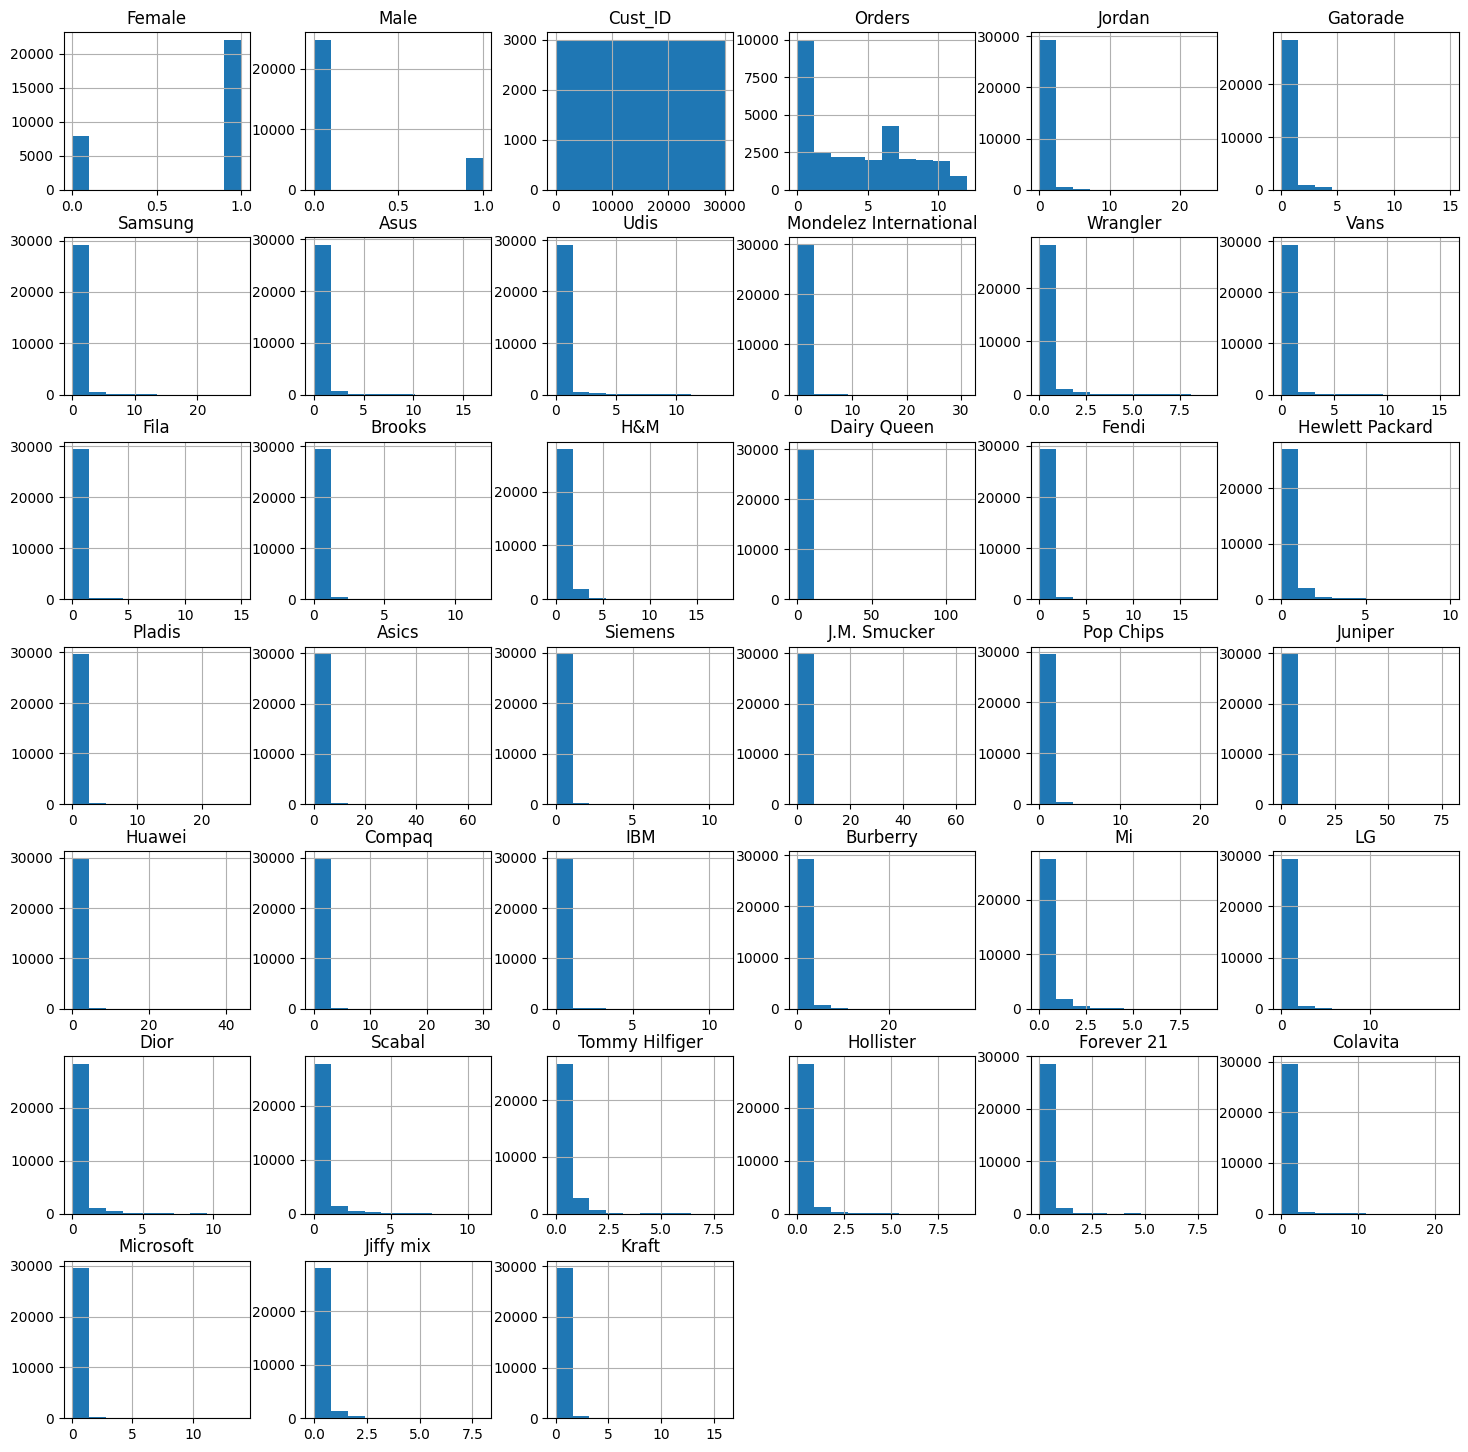

In [24]:
fig=data.hist(figsize=(18,18))



In [28]:
#Observations
counts=data.sum()
print(counts)

Female                        22054
Male                           5222
Cust_ID                   450015000
Orders                       125094
Jordan                         8023
Gatorade                       7570
Samsung                        6688
Asus                           4840
Udis                           4306
Mondelez International         4193
Wrangler                       3208
Vans                           3343
Fila                           2828
Brooks                         4204
H&M                            9846
Dairy Queen                    6280
Fendi                          4244
Hewlett Packard                4833
Pladis                         3183
Asics                          9007
Siemens                        1442
J.M. Smucker                  22644
Pop Chips                      7437
Juniper                       14125
Huawei                         7740
Compaq                         3563
IBM                             959
Burberry                    

In [30]:
#Observations
#A few brands, like J.M. Smucker, Burberry , Scabal, and Juniper, show wider engagement
#ranges, suggesting more frequent or loyal customers.

**Observations**

A few brands, like J.M. Smucker, Burberry , Scabal, and Juniper, show wider engagement
ranges, suggesting more frequent or loyal customers.

Forever 21, LG, and Mi show minimal interactions with occasional higher engagement (up to 10).

**Model Building**

In [32]:
# we cosider only the brand names to segment the customers . Thus, drop the variables cust_id, order and genders  the scale the remaining variables

feature=data.drop(['Orders','Female','Male','Cust_ID'],axis=1)
feature.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


**Feature Scaling**

In [39]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler().fit(feature)
feature=scale.transform(feature)

In [49]:
feature_scaled=pd.DataFrame(feature,columns=data.columns[4:39])
feature_scaled.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,...,-0.210814,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151


In [54]:


from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans.fit(feature_scaled)
    wcss.append(kmeans.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

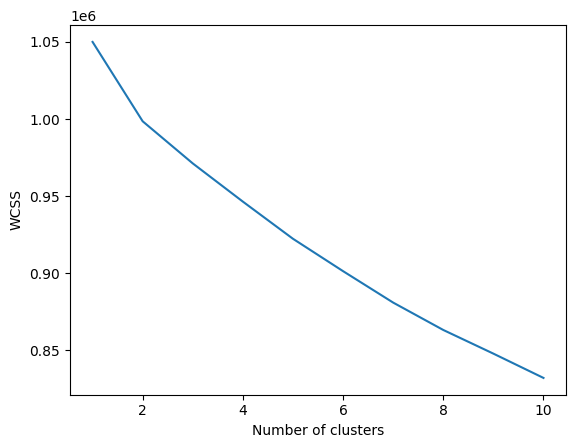

In [55]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Observation**

As we can see in the above plot there is no bend in the line
so, it's hard to find the elbow point

We can go to Silhouette Score to find the no. of clusters


**Silhouette Score**

In [61]:
from sklearn.metrics import silhouette_score
for k in range(4,11):
    cluster=KMeans(n_clusters=k,random_state=10)
    predict=cluster.fit_predict(feature_scaled)
    score=silhouette_score(feature_scaled,predict,random_state=10)
    print ("For n_clusters = {}, silhouette score is {})".format(k, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, silhouette score is 0.28882936660353126)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, silhouette score is 0.27345077326273726)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, silhouette score is 0.21945733520372385)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, silhouette score is 0.20381188273265233)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, silhouette score is 0.19969011593146835)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, silhouette score is 0.19092447316504618)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, silhouette score is 0.2080202156730243)


**Observation**

High silhouette score: Indicates that the clusters are well separated and clearly distinct from one another.

Using the silhouette score, you can ensure that your clustering model not only fits the data but also forms meaningful and well-separated clusters.

In [62]:
# building k means model for k =4
model=KMeans(n_clusters=4,random_state=10)
model.fit(feature_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=10)

In [66]:
# adding cluster column to data
data['Cluster']=model.labels_
data.head()

,Female,Male,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,0,1,1,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,2,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,0,1,3,7,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,5,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0


In [67]:
# check the size of each cluster
np.unique(model.labels_,return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([ 1255, 22772,  5272,   701]))